## 📚 Linear Regression Overview

Linear regression is a supervised machine learning algorithm that establishes a linear relationship between independent variables (features) and a dependent variable (output). The goal is to find the optimal weights $\mathbf{w}$ that minimize the loss, typically measured using the **Mean Squared Error (MSE)**. We’ll explore this process using **matrix notation** for efficiency.

### 🧾 Original Notation

For $m$ samples and $n$ features, the linear regression equation for a single sample is:

$$
y = w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_n x_n
$$

The cost function (MSE) is defined as:

$$
J(\mathbf{w}) = \frac{1}{m} \sum_{i=1}^m \left( y_t^{(i)} - y(x^{(i)}) \right)^2
$$

Where:
- $y_t^{(i)}$ is the **true target value** for the $i$-th sample  
- $y(x^{(i)})$ is the **predicted value** using the model for the $i$-th sample


## 🧮 Matrix Notation Setup

To simplify computations, we convert the linear regression problem into matrix form:

- **True values**: $\mathbf{Y}$ is an $m \times 1$ column vector of ground truth values:

$$
\mathbf{Y}_{m \times 1} = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_m
\end{bmatrix}
$$

- **Weights**: $\mathbf{W}$ is a $(n+1) \times 1$ column vector, including the bias term $w_0$:

$$
\mathbf{W}_{(n+1) \times 1} = \begin{bmatrix}
w_0 \\
w_1 \\
\vdots \\
w_n
\end{bmatrix}
$$

- **Feature matrix**: $\mathbf{X}$ is an $m \times (n+1)$ matrix, where each row represents a sample, and the first column is all 1s (for the bias term):

$$
\mathbf{X}_{m \times (n+1)} = \begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1n} \\
1 & x_{21} & x_{22} & \cdots & x_{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{m1} & x_{m2} & \cdots & x_{mn}
\end{bmatrix}
$$

The predicted values are computed as:

$$
\mathbf{Y}' = \mathbf{X} \mathbf{W}
$$

Where $\mathbf{Y}'$ also has shape $m \times 1$.


## 🧾 Deriving the Cost Function in Matrix Notation

Let’s derive the **Mean Squared Error (MSE)** cost function step-by-step:

### 🔹 Step 1: Compute Predicted Values

The predicted values are:

$$
\mathbf{Y}'_{m \times 1} = \mathbf{X} \mathbf{W}
$$

### 🔹 Step 2: Compute the Loss

The loss vector $\mathbf{L}$ is the difference between true and predicted values:

$$
\mathbf{L}_{m \times 1} = \mathbf{Y} - \mathbf{Y}' = \mathbf{Y} - \mathbf{X} \mathbf{W}
$$

### 🔹 Step 3: Sum of Squared Errors

To compute the sum of squared errors, multiply the transpose of $\mathbf{L}$ by $\mathbf{L}$:

$$
\mathbf{L}^T \mathbf{L} = \sum_{i=1}^m \left( y_i - y_i' \right)^2
$$

### 🔹 Step 4: Compute MSE

Divide by the number of samples $m$ to get the **MSE cost function**:

$$
J(\mathbf{W}) = \frac{1}{m} (\mathbf{Y} - \mathbf{X} \mathbf{W})^T (\mathbf{Y} - \mathbf{X} \mathbf{W})
$$


## 🧠 Computing the Optimal Weights

To find the optimal weights $\mathbf{W}$, we minimize the cost function by taking the derivative with respect to $\mathbf{W}$, setting it to zero, and solving.

---

### 🔹 Step 1: Compute the First Derivative

Using the chain rule:

$$
\frac{\partial J}{\partial \mathbf{W}} = \frac{\partial}{\partial \mathbf{W}} \left[ (\mathbf{Y} - \mathbf{XW})^T (\mathbf{Y} - \mathbf{XW}) \right]
$$

Apply the product rule:

$$
= \left[ \frac{\partial}{\partial \mathbf{W}} (\mathbf{Y} - \mathbf{XW})^T \cdot (\mathbf{Y} - \mathbf{XW}) \right] + \left[ (\mathbf{Y} - \mathbf{XW})^T \cdot \frac{\partial}{\partial \mathbf{W}} (\mathbf{Y} - \mathbf{XW}) \right]
$$

Simplifying:

$$
= -\mathbf{X}^T (\mathbf{Y} - \mathbf{XW}) + (\mathbf{Y} - \mathbf{XW})^T (-\mathbf{X})
$$

Since both terms are transposes of each other:

$$
= -2\mathbf{X}^T (\mathbf{Y} - \mathbf{XW})
$$

---

### 🔹 Step 2: Set to Zero and Solve

Set the derivative to zero:

$$
-2\mathbf{X}^T \mathbf{Y} + 2\mathbf{X}^T \mathbf{X} \mathbf{W} = 0
$$

Simplify:

$$
\mathbf{X}^T \mathbf{X} \mathbf{W} = \mathbf{X}^T \mathbf{Y}
$$

Multiply both sides by $(\mathbf{X}^T \mathbf{X})^{-1}$:

$$
(\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{X} \mathbf{W} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{Y}
$$

Solve for $\mathbf{W}$:

$$
\mathbf{W} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{Y}
$$

This is known as the **Normal Equation**, which gives the optimal weights directly using matrix operations.


## 🧩 Proving Convexity

To determine convexity, we need to check the second derivative for matrices. The second derivative of the cost function $J$, known as the **Hessian** $H$, organizes second-order partial derivatives in matrix form:

- $J(\mathbf{W})$ is **strictly convex** if $H$ is a **Positive Definite Matrix**  
- $J(\mathbf{W})$ is **convex** if $H$ is a **Positive Semi-Definite Matrix**  
- $J(\mathbf{W})$ is **strictly concave** if $H$ is a **Negative Definite Matrix**  
- $J(\mathbf{W})$ is **concave** if $H$ is a **Negative Semi-Definite Matrix**  

---

### 🔹 Computing the Hessian

We compute the second derivative of the cost function:

$$
H = \frac{\partial^2 J}{\partial \mathbf{W}^2} = \frac{\partial}{\partial \mathbf{W}} \left[ -2\mathbf{X}^T \mathbf{Y} + 2\mathbf{X}^T \mathbf{X} \mathbf{W} \right] = 2\mathbf{X}^T \mathbf{X}
$$

---

### 🔹 Verifying Convexity

To prove **strict convexity**, we need to check whether $\mathbf{X}^T \mathbf{X}$ is **positive definite**.

A symmetric matrix $A$ is **positive definite** if:

$$
A = B^T B
$$

for some matrix $B$ with **linearly independent columns**.

Since $\mathbf{X}^T \mathbf{X}$ is symmetric, the MSE cost function is **convex** if the columns of $\mathbf{X}$ are linearly independent.

---

### ✅ Conclusion:

The MSE cost function is **convex** if:

- The feature matrix $\mathbf{X}$ has **full column rank**, i.e., its columns are linearly independent  
- The number of linearly independent columns equals the number of features $n$

This ensures that $\mathbf{X}^T \mathbf{X}$ is **positive definite**, making $J(\mathbf{W})$ strictly convex.


## Step 1: Visualize the Data
First, let's visualize the relationships between all features and the target variable using a correlation matrix and pairplot.

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


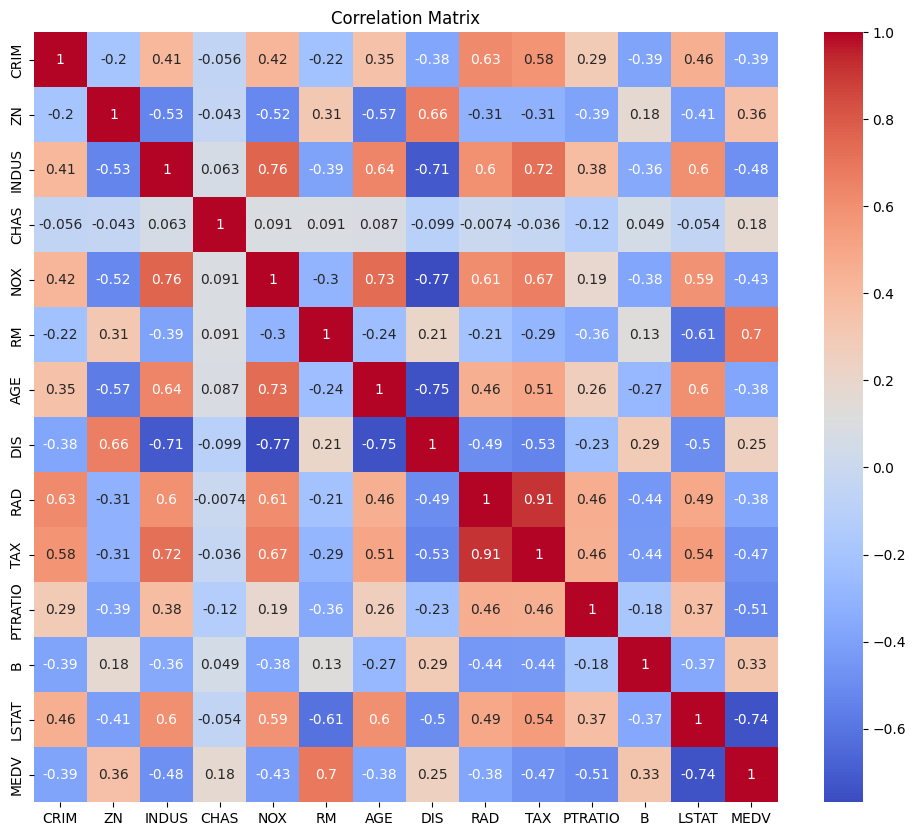

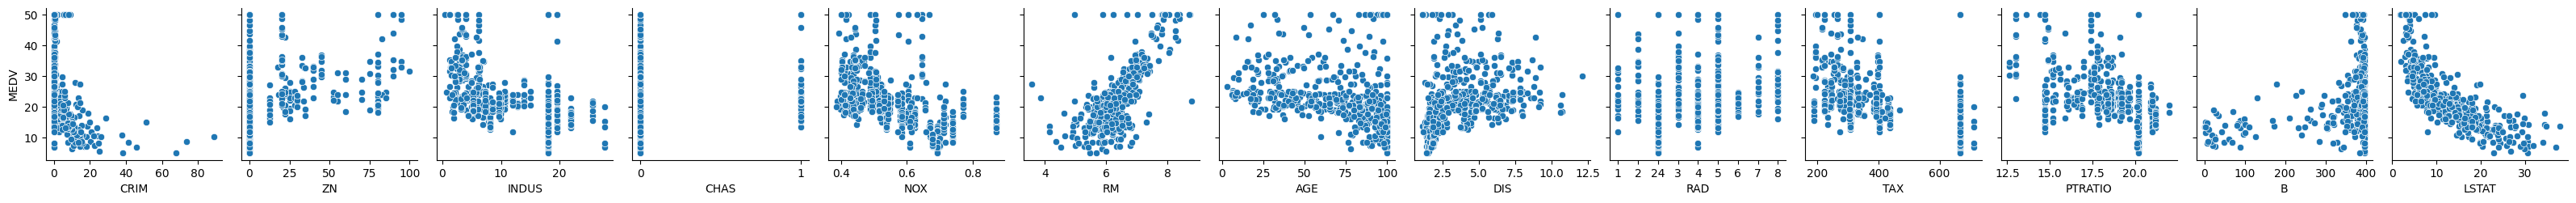

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load Boston housing dataset from OpenML
data = fetch_openml(name="boston", version=1, as_frame=True)
X, y = data.data, data.target

# Combine features and target into a single DataFrame
df = pd.concat([X, y.rename("MEDV")], axis=1)

# Display the first few rows of the DataFrame
print(df.head())

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(df, y_vars=["MEDV"], x_vars=df.columns[:-1])
plt.show()

## 🧱 Step 2: Select Features

After visualizing the data, you can select the features that have a strong correlation with the target variable.

For example, if you find that:

- `RM` (average number of rooms per dwelling)  
- `LSTAT` (percentage of lower status of the population)  

have strong correlations with `MEDV` (median value of owner-occupied homes), then these features can be selected for training.

Choosing features with high correlation helps improve the performance of the model by reducing noise and focusing on the most informative inputs.


In [2]:
# Select specific features based on correlation analysis
selected_features = ['RM', 'LSTAT']  # Example features
X = X[selected_features]

## 🔄 Why Normalize Data and How to Do It

Normalization is essential in machine learning to ensure that all features contribute equally to the model. It helps:

- Improve convergence speed in optimization algorithms
- Avoid dominance of features with large scales
- Enhance model accuracy and stability

### Common Methods of Normalization:

- **Min-Max Scaling**
- **Z-score Normalization (Standardization)**
- **Max Abs Scaling**
- **Robust Scaling**
- **L2 Normalization**
- **Decimal Scaling**


### Min-Max Normalization (Feature Scaling)

#### **Introduction**

Min-Max Normalization is a technique used to scale features to a specific range, typically [0, 1]. This is particularly useful in machine learning algorithms that are sensitive to the scale of input data, such as gradient descent-based methods.

#### **Formula**

The formula for Min-Max Normalization is:

$$
X' = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

Where:
- $X$ is the original value.
- $X_{\text{min}}$ is the minimum value in the dataset.
- $X_{\text{max}}$ is the maximum value in the dataset.
- $X'$ is the normalized value.

#### **Steps**

1. **Identify the Minimum and Maximum Values**: Determine the minimum and maximum values for each feature in the dataset.
2. **Apply the Formula**: Use the formula to scale each feature to the range [0, 1].
3. **Transform the Dataset**: Replace the original values with the normalized values.

In [3]:
# Convert columns to float
X = X.astype(float)
y = y.astype(float)

# Min-Max Normalization
X_min = np.min(X, axis=0)
X_max = np.max(X, axis=0)
X_norm = (X - X_min) / (X_max - X_min)

# Min-Max Normalization
y_min = np.min(y, axis=0)
y_max = np.max(y, axis=0)
y_norm = (y - y_min) / (y_max - y_min)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=42)

# Display the selected features
print("Selected features for training:")
print(X_train.head())

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

Selected features for training:
           RM     LSTAT
477  0.333972  0.639625
15   0.435524  0.185982
332  0.473271  0.168322
423  0.487066  0.594923
19   0.415022  0.263521


### Z-Score Normalization (Standardization)

#### **Introduction**

Z-Score Normalization, or Standardization, is a technique used to scale features so that they have the properties of a standard normal distribution with a mean of 0 and a standard deviation of 1. This is particularly useful for algorithms that assume the input data is normally distributed.

#### **Formula**

The formula for Z-Score Normalization is:

$$
Z = \frac{X - \mu}{\sigma}
$$

**Where**:
- $X$ is the original value.
- $\mu$ is the mean of the dataset.
- $\sigma$ is the standard deviation of the dataset.
- $Z$ is the standardized value.

#### **Steps**

1. **Calculate the Mean**: Compute the mean $\mu$ of the dataset.
2. **Calculate the Standard Deviation**: Compute the standard deviation $\sigma$ of the dataset.
3. **Apply the Formula**: Use the formula to transform each feature to have a mean of 0 and a standard deviation of

In [ ]:
# Convert columns 3 and 8 to float
X = X.astype(float)
y = y.astype(float)

# Standardization (Z-score Normalization)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_zscore = (X - X_mean) / X_std

# Standardization (Z-score Normalization)
y_mean = np.mean(y, axis=0)
y_std = np.std(y, axis=0)
y_zscore = (y - y_mean) / y_std

X_train, X_test, y_train, y_test = train_test_split(X_zscore, y_zscore, test_size=0.2, random_state=42)


# Display the selected features
print("Selected features for training:")
print(X_train.head())

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Calculating the Weight Matrix ($W$) Using the Normal Equation

#### **Introduction**

In linear regression, the goal is to find the optimal parameters (weights) that minimize the cost function (Mean Squared Error). One efficient way to compute these optimal parameters is by using the **Normal Equation**.

#### **Normal Equation**

The Normal Equation provides a closed-form solution to find the optimal weight vector $W$:

$$
W = (X^T X)^{-1} X^T Y
$$

Where:

- $W$ is the weight vector (parameters) we want to calculate.
- $X$ is the feature matrix (with dimensions $m \times (n+1)$, where $m$ is the number of samples and $n$ is the number of features; the extra column is for the bias term).
- $Y$ is the target vector (with dimensions $m \times 1$).

In [4]:
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

## Computing Predictions for Linear Regression

In this section, we compute the predicted values for both the test and training datasets using the weight vector \( w \) obtained from our linear regression model.

### Purpose

These predictions are essential for evaluating the performance of the linear regression model. By comparing the predicted values to the actual target values, we can calculate metrics such as Mean Squared Error (MSE) to assess how well the model generalizes to unseen data and fits the training data.

In [5]:
# compute predictions on the test set
y_test_pred = X_test @ w

# compute predictions on the training set
y_train_pred = X_train @ w

## 3D Visualization of Predictions for Training and Test Data

### Introduction

In this section, we visualize the predictions of our linear regression model in a 3D space using the features `RM` (average number of rooms) and `LSTAT` (lower status of the population). This visualization helps us understand how well the model's predictions align with the actual target values for both the training and test datasets.

### Visualization Steps

1. **Mesh Grid Creation**:
   - We create a mesh grid over the range of `RM` and `LSTAT` values for both the training and test datasets. This grid is used to evaluate the model's predictions across the feature space.

2. **Prediction Surface**:
   - Using the weight vector \( w \) obtained from our model, we predict values over the mesh grid to create a continuous prediction surface.

3. **3D Scatter Plot**:
   - We plot the actual data points for both the training and test datasets. These points are compared against the prediction surface to assess the model's performance.

## Code Explanation

- **Training Data Visualization**:
  - A 3D scatter plot is created for the actual training data points.
  - A surface plot is overlaid to represent the model's predictions across the feature space.

- **Test Data Visualization**:
  - Similarly, a 3D scatter plot is created for the actual test data points.
  - A surface plot is overlaid to represent the model's predictions for the test data.

### Conclusion

This 3D visualization provides a comprehensive view of how well the model's predictions align with the actual data. By comparing the prediction surfaces with the actual data points, we can visually assess the model's accuracy and identify any potential areas for improvement.

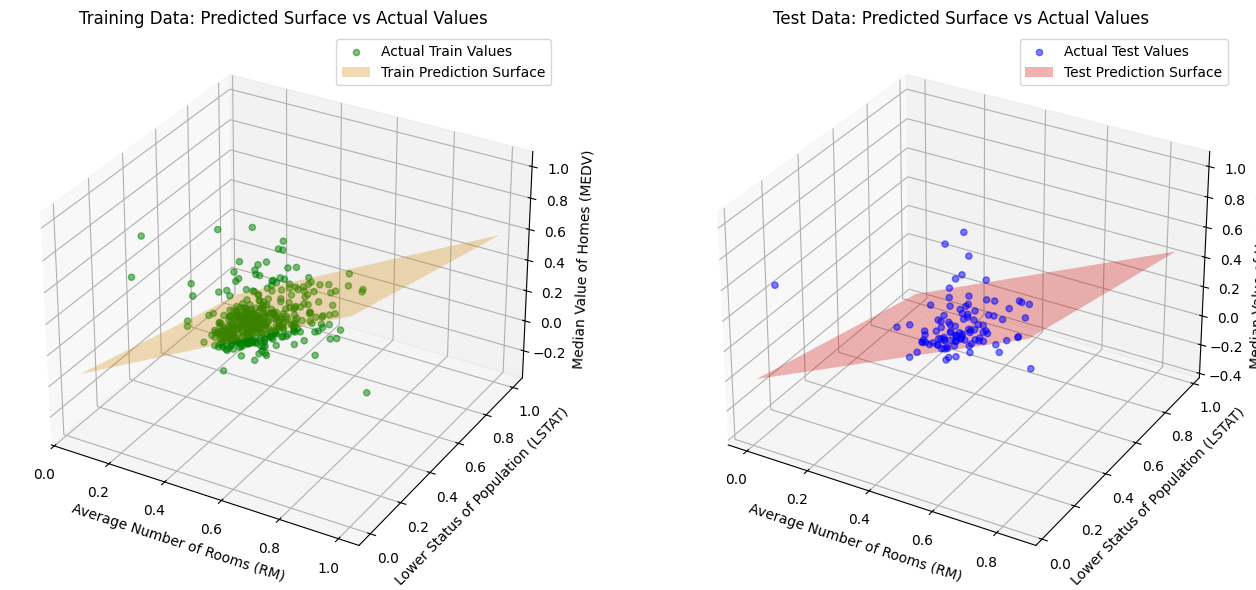

In [6]:
# Assuming y_test_pred, y_test, y_train_pred, and y_train are your predicted and actual values
# And X_train and X_test are your feature matrices converted to numpy arrays

# Create a mesh grid for the surface plot
rm_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
lstat_range = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100)
rm_grid, lstat_grid = np.meshgrid(rm_range, lstat_range)

# Flatten the grid to pass through the model
grid_points = np.c_[rm_grid.ravel(), lstat_grid.ravel()]

# Predict using the model (assuming w is your weight vector)
z_pred_train = grid_points @ w
z_pred_train = z_pred_train.reshape(rm_grid.shape)

# Create a mesh grid for the test surface plot
rm_range_test = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
lstat_range_test = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100)
rm_grid_test, lstat_grid_test = np.meshgrid(rm_range_test, lstat_range_test)

# Flatten the grid to pass through the model
grid_points_test = np.c_[rm_grid_test.ravel(), lstat_grid_test.ravel()]

# Predict using the model for test data
z_pred_test = grid_points_test @ w
z_pred_test = z_pred_test.reshape(rm_grid_test.shape)

# Plot for Training Data
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_train[:, 0], X_train[:, 1], y_train, color='green', label='Actual Train Values', alpha=0.5)
ax1.plot_surface(rm_grid, lstat_grid, z_pred_train, color='orange', alpha=0.3, label='Train Prediction Surface')
ax1.set_xlabel('Average Number of Rooms (RM)')
ax1.set_ylabel('Lower Status of Population (LSTAT)')
ax1.set_zlabel('Median Value of Homes (MEDV)')
ax1.set_title('Training Data: Predicted Surface vs Actual Values')
ax1.legend()

# Plot for Test Data
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', label='Actual Test Values', alpha=0.5)
ax2.plot_surface(rm_grid_test, lstat_grid_test, z_pred_test, color='red', alpha=0.3, label='Test Prediction Surface')
ax2.set_xlabel('Average Number of Rooms (RM)')
ax2.set_ylabel('Lower Status of Population (LSTAT)')
ax2.set_zlabel('Median Value of Homes (MEDV)')
ax2.set_title('Test Data: Predicted Surface vs Actual Values')
ax2.legend()

plt.tight_layout()
plt.show()

## Visualization of Predicted vs. Actual Values

### Introduction

In this section, we visualize the performance of our linear regression model by comparing the predicted values against the actual target values for both the test and training datasets. This helps us assess how well the model is performing and identify any discrepancies between predictions and actual outcomes.

### Visualization Steps

1. **Scatter Plot for Test Data**:
   - We create a scatter plot to visualize the relationship between the predicted and actual values for the test dataset.
   - A diagonal line representing perfect predictions is included for reference.

2. **Scatter Plot for Training Data**:
   - Similarly, a scatter plot is created for the training dataset to compare predicted and actual values.
   - The same diagonal line is used to indicate perfect predictions.

### Code Explanation

- **Test Data Plot**:
  - The x-axis represents the actual values, while the y-axis represents the predicted values.
  - Each point on the plot corresponds to a sample in the test dataset.
  - The diagonal line (`k--`) indicates where the predicted values would perfectly match the actual values.

- **Training Data Plot**:
  - The x-axis represents the actual values, and the y-axis represents the predicted values for the training dataset.
  - Similar to the test data plot, the diagonal line serves as a reference for perfect predictions.

### Conclusion

These visualizations provide a clear view of the model's accuracy. Ideally, the points should lie close to the diagonal line, indicating that the predicted values closely match the actual values. Any significant deviations from this line may suggest areas where the model could be improved.

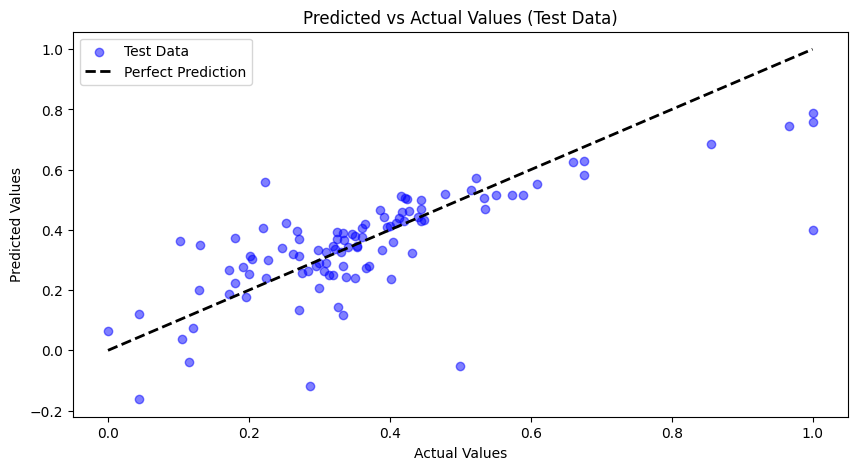

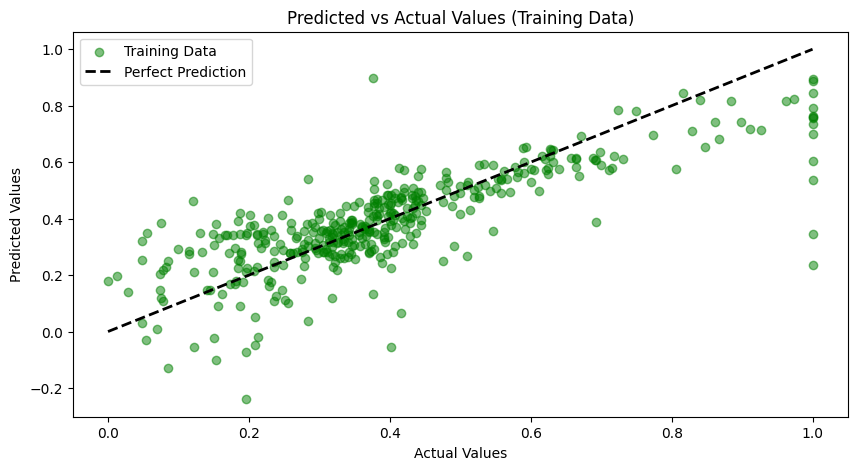

In [7]:
# Assuming y_pred and y_test are your predicted and actual values for the test set
# And y_train_pred and y_train are your predicted and actual values for the training set

# Plot for Test Data
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue', label='Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Test Data)')
plt.legend()
plt.show()

# Plot for Training Data
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_train_pred, alpha=0.5, color='green', label='Training Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Training Data)')
plt.legend()
plt.show()

## Evaluating the Model on Test Data

Since Fashion MNIST is a classification dataset, we’ll evaluate the linear regression model in two ways:
1. **Regression Metric**: Compute the Mean Squared Error (MSE) by treating the labels as continuous values.
2. **Classification Metric**: Convert the regression predictions to class labels (by rounding) and compute accuracy.

### 📊 Analysis of Results

---

#### 🔸 **Mean Squared Error (MSE)**

- The **MSE** on the test set indicates how well the linear regression model predicts the labels as continuous values.  
- A **high MSE** suggests that linear regression may not be the best model for this classification task.

---

#### 🔸 **Accuracy**

- **Definition**: Accuracy is the proportion of correctly predicted instances out of the total instances.

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$

- **Interpretation**:  
  In the context of using **linear regression for classification**, accuracy provides a basic performance measure. However, since linear regression is not designed for classification, results may be suboptimal compared to models like **logistic regression** or **neural networks**.

- **Expected Ranges**:
  - **High Accuracy** (> 80%): Good model performance.
  - **Moderate Accuracy** (60–80%): Captures some patterns; room for improvement.
  - **Low Accuracy** (< 60%): Model is likely ineffective for classification.

- **Considerations**:
  - **Class Imbalance**: Accuracy may be misleading—consider other metrics like **precision**, **recall**, or **F1-score**.
  - **Thresholding**: Since linear regression outputs continuous values, a **threshold** must be chosen to convert outputs to class labels. This choice impacts accuracy significantly.

---

#### 🔸 **Overfitting vs Underfitting**

- **Overfitting**: If training MSE ≪ test MSE  
  → The model fits the training data well but fails to generalize.

- **Underfitting**: If both MSEs are high  
  → The model is too simple and fails to capture data patterns.

$$
J_{\text{train}}(\mathbf{w}) \approx J_{\text{test}}(\mathbf{w}) \gg 0
$$


In [8]:
# Compute MSE
mse = np.mean((y_test - y_test_pred) ** 2)
print("Mean Squared Error (MSE) on test set:", mse)

mse_train = np.mean((y_train - y_train_pred) ** 2)
print("Mean Squared Error (MSE) on training set:", mse_train)

Mean Squared Error (MSE) on test set: 0.017817723321848052
Mean Squared Error (MSE) on training set: 0.016118460026861584


In [42]:
print(y_max)
print(y_min)

# Reverse normalization for predictions
y_pred_original = y_test_pred * (y_max - y_min) + y_min
y_test_original = y_test * (y_max - y_min) + y_min

y_train_original = y_train * (y_max - y_min) + y_min
y_train_pred_original = y_train_pred * (y_max - y_min) + y_min

print("y test pred original :", y_pred_original[0:5])
print("y test actual original :", y_test_original[0:5])
print("y train pred original :", y_train_pred_original[0:5])
print("y train actual original :", y_train_original[0:5])

# Function to categorize data into specified number of sections
def categorize_data(data, num_sections, y_min, y_max):
    section_edges = np.linspace(y_min, y_max, num_sections + 1)
    categories = np.digitize(data, section_edges) - 1
    return categories, section_edges


# Number of sections to divide the data into
num_sections = 10  # You can change this value as needed

# Categorize predictions and actual values
y_pred_class, section_edges = categorize_data(y_pred_original, num_sections, y_min, y_max)
y_test_class,_ = categorize_data(y_test_original, num_sections, y_min, y_max)

# Categorize training predictions and actual values
y_train_pred_class, _ = categorize_data(y_train_pred_original, num_sections, y_min, y_max)
y_train_class, _ = categorize_data(y_train_original, num_sections, y_min, y_max)

# Print category ranges
print("\n\n Category Ranges:")
for i in range(len(section_edges) - 1):
    print(f"Category {i}: {section_edges[i]} to {section_edges[i+1]}")

print('\n\ny test pred class :', y_pred_class[0:5])
print('y test actual class :', y_test_class[0:5])
print('y train pred class :', y_train_pred_class[0:5])
print('y train actual class :', y_train_class[0:5])

# Compute accuracy for the test set
accuracy_test = np.mean(y_pred_class == y_test_class)
print("\n\nClassification accuracy on test set:", accuracy_test)

# Compute accuracy for the training set
accuracy_train = np.mean(y_train_pred_class == y_train_class)
print("Classification accuracy on training set:", accuracy_train)

50.0
5.0
y test pred original : [24.81849295 29.90943812 17.49907703 23.49723789 20.36120178]
y test actual original : [23.6 32.4 13.6 22.8 16.1]
y train pred original : [ 9.13579522 20.38693595 22.24135263 16.24186426 18.33205011]
y train actual original : [12.  19.9 19.4 13.4 18.2]


 Category Ranges:
Category 0: 5.0 to 9.5
Category 1: 9.5 to 14.0
Category 2: 14.0 to 18.5
Category 3: 18.5 to 23.0
Category 4: 23.0 to 27.5
Category 5: 27.5 to 32.0
Category 6: 32.0 to 36.5
Category 7: 36.5 to 41.0
Category 8: 41.0 to 45.5
Category 9: 45.5 to 50.0


y test pred class : [4 5 2 4 3]
y test actual class : [4 6 1 3 2]
y train pred class : [0 3 3 2 2]
y train actual class : [1 3 3 1 2]


Classification accuracy on test set: 0.4215686274509804
Classification accuracy on training set: 0.4183168316831683
